# Well, it works. It took me 4 freaking hours, but it works!

## Unfortunately, it's slower than 95% of solutions while also using more memory than 95% of solutions. 

## So, that's the worst of both worlds! Beans!

In [60]:
from typing import Optional # shorthand for Union[type,None]

In [136]:
class TreeNode:
    def __init__(self, treeKeys: list):
        # 3 props: val, left, right
        self.val   = treeKeys[0]
        nodeCount  = len(treeKeys)

        if nodeCount == 1:
          self.left  = None
          self.right = None
        else:
          ltree = getSubtreeKeys(treeKeys,leftSide=True)
          rtree = getSubtreeKeys(treeKeys,leftSide=False)

          # recursive definition
          self.left  = TreeNode(ltree)
          self.right = TreeNode(rtree)

def getSubtreeKeys(treeKeys: list, leftSide:bool = True) -> list:
  # subtree root position
  if leftSide:
    rootPosition = 1
  else:
    rootPosition = 2

  nodeCount = len(treeKeys)

  # if no subtree can be obtained, give an empty list
  if nodeCount == 1:
    return []
  else:
    pass
  
  positionQueue     = [rootPosition]
  subtreeKeys       = []

  while len(positionQueue) > 0:
    # append indices
    thisPosition   = positionQueue[0]
    positionQueue  = positionQueue[1:]

    subtreeKeys.append(treeKeys[thisPosition])

    newPosition    = (thisPosition+1)*2 - 1

    if newPosition >= nodeCount:
      pass
    else:
      positionQueue += [newPosition, newPosition + 1]

  return subtreeKeys

def treeTravel(root: Optional[TreeNode], boolList: list) -> Optional[TreeNode]:
  # convention: true = left, false = right
  currentNode = root
  for boolVal in boolList:
    if boolVal:
      currentNode = currentNode.left
    else:
      currentNode = currentNode.right

  return currentNode

def treeAssign(root: Optional[TreeNode], boolList: list, val2assign: Optional[int]) -> Optional[TreeNode]:
  newTree = root
  runningPath = 'newTree'

  for boolVal in boolList:
    if boolVal:
      runningPath += '.left'
    else:
      runningPath += '.right'
  
  path2exec = runningPath+'.val='+str(val2assign)
  print(path2exec)
  exec(path2exec)

  return newTree

In [137]:
class Solution:
  def convertBST(self, root: Optional[TreeNode]) -> Optional[TreeNode]:
    # this would be so much easier to do efficiently with pointers...
    # alas, poor Yorick! You've chosen Python as your language!
    newTree     = root

    # hey dummy if root is gonna be the "optional" type that means you need a way to handle the null tree!
    # that is to say, if you get none, you give none
    if newTree is None:
      return newTree
    else:
      pass

    # define your staging stacks
    boolStack   = [[]] # a stack of boolean search paths. empty list = get the root
    nodeStack   = [root]
    leftChildVisitedStack  = [False]
    rightChildVisitedStack = [False]

    # define your final lists
    boolAscendingList = []
    valAscendingList  = []

    val2add           = 0

    # iterate until nodeStack is empty
    # go from left to right
    while len(nodeStack) > 0:
      currentNode = nodeStack[-1]
      currentBool = boolStack[-1]
      leftChildVisited  = leftChildVisitedStack[-1]
      rightChildVisited = rightChildVisitedStack[-1]

      if not leftChildVisited:
        leftChildVisitedStack[-1] = True
        if currentNode.left is not None and currentNode.left.val is not None:
          boolStack.append( currentBool+[True] )
          nodeStack.append( currentNode.left )
          leftChildVisitedStack.append(False)
          rightChildVisitedStack.append(False)
        else:
          pass # i.e., you "groundhog" it (which can't be efficient...)

      elif not rightChildVisited:
        rightChildVisitedStack[-1] = True
        if currentNode.right is not None and currentNode.right.val is not None:
          # instead of adding to the end like a stack, "swooce" it in to preserve sorting of values: because you're going right, you're bigger than the previous value
          boolStack = boolStack[:-1]+[currentBool+[False]]+[currentBool]
          nodeStack = nodeStack[:-1]+[currentNode.right]+[currentNode]
          leftChildVisitedStack  = leftChildVisitedStack[:-1] + [False,leftChildVisitedStack[-1]]
          rightChildVisitedStack = rightChildVisitedStack[:-1] + [False,rightChildVisitedStack[-1]]
        else:
          pass

      else:

        thisBool = boolStack.pop()
        thisNode = nodeStack.pop()
        rightChildVisitedStack.pop()
        leftChildVisitedStack.pop()

        boolAscendingList.append(thisBool)
        valAscendingList.append(thisNode.val)

    # now iterate through the ascending lists, sequentially popping them
    # (should be sorted from smallest to largest, so popping should get the order right)
    while len(valAscendingList) > 0:
      thisBool = boolAscendingList.pop()
      thisVal  = valAscendingList.pop()
      newTree  = treeAssign(newTree,thisBool,thisVal+val2add)
      val2add += thisVal

    return newTree

null  = None
root  = [4,1,6,0,2,5,7,null,null,null,3,null,null,null,8]

treeStruc = TreeNode(root)

soln = Solution()
betterTree = soln.convertBST(treeStruc)

newTree.right.right.right.val=8
newTree.right.right.val=15
newTree.right.val=21
newTree.right.left.val=26
newTree.val=30
newTree.left.right.right.val=33
newTree.left.right.val=35
newTree.left.val=36
newTree.left.left.val=36


# Here's the Leetcode-approved solution:

In [141]:
class Solution(object):
    def __init__(self):
        self.total = 0

    def convertBST(self, root):
        if root is not None and root.val is not None: # I had to add "and root.val is not None" to account for how I handle null entries
            self.convertBST(root.right) # yeah I figured it had something to do with recursion.
            self.total += root.val
            root.val = self.total
            self.convertBST(root.left) # ah! the tricky part: recursion stacks inward, not downward!
        return root

null  = None
root  = [4,1,6,0,2,5,7,null,null,null,3,null,null,null,8]

treeStruc = TreeNode(root)

soln = Solution()
bestTree = soln.convertBST(treeStruc)



Complexity Analysis

Time complexity : O(n)

A binary tree has no cycles by definition, so convertBST gets called on each node no more than once. Other than the recursive calls, convertBST does a constant amount of work, so a linear number of calls to convertBST will run in linear time.

Space complexity : O(n)

Using the prior assertion that convertBST is called a linear number of times, we can also show that the entire algorithm has linear space complexity. Consider the worst case, a tree with only right (or only left) subtrees. The call stack will grow until the end of the longest path is reached, which in this case includes all nn nodes.

# Another LeetCode solution: Iteration with a Stack
## O(n) time complexity, O(n) space complexity

In [ ]:
class Solution(object):
    def convertBST(self, root):
        total = 0
        
        node = root
        stack = []
        while stack or node is not None:
            # push all nodes up to (and including) this subtree's maximum on
            # the stack.
            while node is not None:
                stack.append(node)
                node = node.right

            node = stack.pop()
            total += node.val
            node.val = total

            # all nodes with values between the current and its parent lie in
            # the left subtree.
            node = node.left

        return root

# Finally, the most complicated (but best) answer:
## Reverse Morris In-Order Traversal
## O(n) time complexity
## O(1) space complexity

In [ ]:
class Solution(object):
    def convertBST(self, root):
        # Get the node with the smallest value greater than this one.
        def get_successor(node):
            succ = node.right
            while succ.left is not None and succ.left is not node:
                succ = succ.left
            return succ
                
        total = 0
        node = root
        while node is not None:
            # If there is no right subtree, then we can visit this node and
            # continue traversing left.
            if node.right is None:
                total += node.val
                node.val = total
                node = node.left
            # If there is a right subtree, then there is a node that has a
            # greater value than the current one. therefore, we must traverse
            # that node first.
            else:
                succ = get_successor(node)
                # If there is no left subtree (or right subtree, because we are
                # in this branch of control flow), make a temporary connection
                # back to the current node.
                if succ.left is None:
                    succ.left = node
                    node = node.right
                # If there is a left subtree, it is a link that we created on
                # a previous pass, so we should unlink it and visit this node.
                else:
                    succ.left = None
                    total += node.val
                    node.val = total
                    node = node.left
        
        return root

## Intuition

There is a clever way to perform an in-order traversal using only linear time and constant space, first described by J. H. Morris in his 1979 paper "Traversing Binary Trees Simply and Cheaply". In general, the recursive and iterative stack methods sacrifice linear space for the ability to return to a node after visiting its left subtree. The Morris traversal instead exploits the unused null pointer(s) of the tree's leaves to create a temporary link out of the left subtree, allowing the traversal to be performed using only constant additional memory. To apply it to this problem, we can simply swap all "left" and "right" references, which will reverse the traversal.

## Algorithm

First, we initialize node, which points to the root. Then, until node points to null (specifically, the left null of the tree's minimum-value node), we repeat the following. First, consider whether the current node has a right subtree. If it does not have a right subtree, then there is no unvisited node with a greater value, so we can visit this node and move into the left subtree. If it does have a right subtree, then there is at least one unvisited node with a greater value, and thus we must visit first go to the right subtree. To do so, we obtain a reference to the in-order successor (the smallest-value node larger than the current) via our helper function getSuccessor. This successor node is the node that must be visited immediately before the current node, so it by definition has a null left pointer (otherwise it would not be the successor). Therefore, when we first find a node's successor, we temporarily link it (via its left pointer) to the node and proceed to the node's right subtree. Then, when we finish visiting the right subtree, the leftmost left pointer in it will be our temporary link that we can use to escape the subtree. After following this link, we have returned to the original node that we previously passed through, but did not visit. This time, when we find that the successor's left pointer loops back to the current node, we know that we have visited the entire right subtree, so we can now erase the temporary link and move into the left subtree.

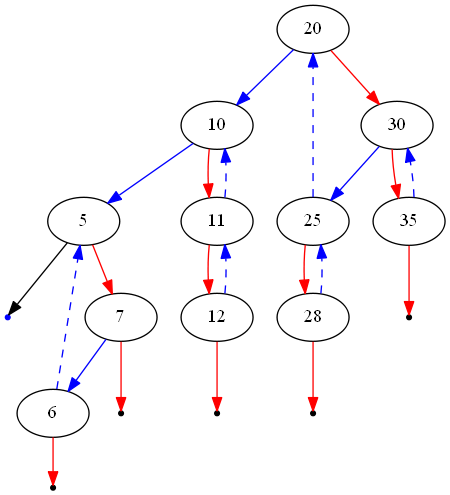

## Reverse Morris Traversal Example

The figure above shows an example of the modified tree during a reverse Morris traversal. Left pointers are illustrated in blue and right pointers in red. Dashed edges indicate temporary links generated at some point during the algorithm (which will be erased before it terminates). Notice that blue edges can be dashed, as we always exploit the empty left pointer of successor nodes. Additionally, notice that every node with a right subtree has a link from its in-order successor.

# Main theme of all of these

## "Nugget" recursion

## Flank the "nugget" from before with recursive traversals of right subtrees 

## and flank it from after with recrusive traversals of left subtrees